In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
url_data_comments = '/content/drive/MyDrive/Project/Tiki/comments.xlsx'
df_commnets = pd.read_excel(url_data_comments)
df_commnets

,id_comment,title,content,Positive,Negative,Netural,rating,id_product,timeline
0,20097857,Cực kì hài lòng,"Máy nhìn đẹp, cầm hơi nhẹ, hy vọng tốt.",Thiết kế đẹp,NaN,Khối lượng nhẹ,5,277776275,2025-03-17 21:21:56
1,20108525,Cực kì hài lòng,Cam ứng và nhận dien văn tay khá kém tuy nhiên...,Bao bì tốt,"Cảm ứng kém, Nhận diện vân tay kém",NaN,5,277776275,2025-04-10 07:11:59
2,20032217,Cực kì hài lòng,Giá thành vậy ko mong gì hơn. Cảm ơn tiki.,Sản phẩm tốt,NaN,NaN,5,277776275,2024-11-16 23:50:38
3,20086195,Cực kì hài lòng,NaN,NaN,NaN,NaN,5,277776275,2025-02-23 10:55:37
4,20061373,Cực kì hài lòng,"Tôi đã nhận được điện thoại cần mua, rất ok, c...",Sản phẩm tốt,NaN,NaN,5,277776275,2025-01-06 11:40:36
...,...,...,...,...,...,...,...,...,...
5393,20037868,Rất không hài lòng,Mô tả thông tin không rõ ràng. Mua nhầm.,NaN,mo ta san pham,NaN,1,214756058,2024-11-26 20:28:53
5394,20055155,Hài lòng,"thank you, good",NaN,NaN,NaN,4,214756058,2024-12-25 09:37:59
5395,18783171,Hài lòng,Sản phẩm tốt,san pham tot,NaN,NaN,4,214756058,2023-02-11 17:04:50
5396,19681482,Hài lòng,NaN,NaN,NaN,NaN,4,214756058,2023-12-13 21:16:33


# Data Processing

- Những title đánh giá san phẩm

In [ ]:
df_commnets['title'].unique()

array(['Cực kì hài lòng', 'Hài lòng', 'Rất không hài lòng', 'Bình thường',
       'Không hài lòng', 'Nên mua', 'Perfect', 'Chất lượng tốt',
       'Hàng chất lượng', 'Điện thoại dùng tốt', 'Hàng Chất Lượng',
       'Tạm chấp nhận được', 'Hàng dùng tốt, giao hànglaau',
       'Rất chuyên nghiệp', 'Sản phẩm tốt', 'Thực sự hài lòng', 'Good',
       'điện thoại đẹp', 'HÀNG ĐẸP', 'Rất hài lòng',
       'Không có ống nghe nói', 'Ok', 'Điện thoai bàn Panasonic tốt',
       'Giao hàng nhanh, hàng chính hãng'], dtype=object)

In [ ]:
title = df_commnets.groupby('title')['id_comment'].count().rename('count').reset_index()
title.sort_values(by='count', inplace=True, ascending=False)
title

,title,count
2,Cực kì hài lòng,4968
6,Hài lòng,269
17,Rất không hài lòng,80
0,Bình thường,42
11,Không hài lòng,19
8,Hàng chất lượng,2
3,"Giao hàng nhanh, hàng chính hãng",1
1,Chất lượng tốt,1
7,Hàng Chất Lượng,1
5,HÀNG ĐẸP,1


<Axes: xlabel='title'>

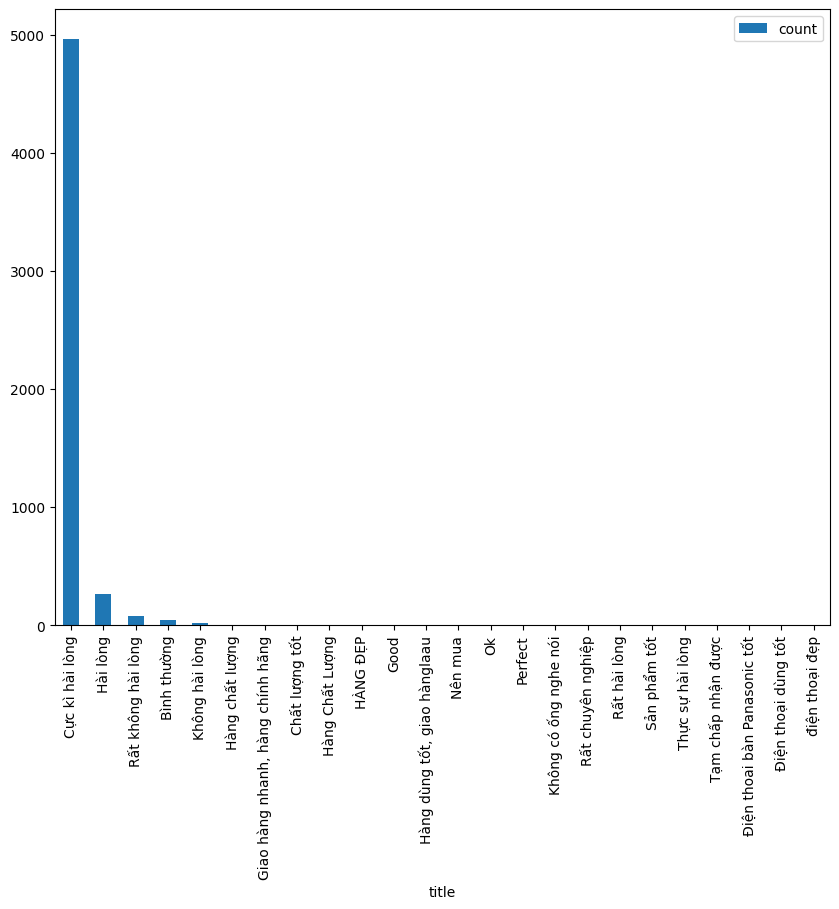

In [ ]:
title.plot(x='title', y='count',kind='bar', figsize=(10,8))

- Thông thường tiêu đề của các đánh giá sản phẩm sẽ nằm trong năm giá trị ['Cực kì hài lòng', 'Hài lòng', 'Bình thường', 'Không hài lòng', 'Rất không hài lòng'] và trong data năm giá trị này cũng chiếm phần lớn giá trị --> các giá trị còn lại sẽ bị loại bỏ chỉ giữ lại 5 giá trị này

In [ ]:
# loại bỏ các bản ghi có giá trị title không nằm trong 5 giá trị trên
title_common = ['Cực kì hài lòng', 'Hài lòng', 'Bình thường', 'Không hài lòng', 'Rất không hài lòng']
df_commnets_v2 = df_commnets[df_commnets['title'].isin(title_common)]
df_commnets_v2

,id_comment,title,content,Positive,Negative,Netural,rating,id_product,timeline
0,20097857,Cực kì hài lòng,"Máy nhìn đẹp, cầm hơi nhẹ, hy vọng tốt.",Thiết kế đẹp,NaN,Khối lượng nhẹ,5,277776275,2025-03-17 21:21:56
1,20108525,Cực kì hài lòng,Cam ứng và nhận dien văn tay khá kém tuy nhiên...,Bao bì tốt,"Cảm ứng kém, Nhận diện vân tay kém",NaN,5,277776275,2025-04-10 07:11:59
2,20032217,Cực kì hài lòng,Giá thành vậy ko mong gì hơn. Cảm ơn tiki.,Sản phẩm tốt,NaN,NaN,5,277776275,2024-11-16 23:50:38
3,20086195,Cực kì hài lòng,NaN,NaN,NaN,NaN,5,277776275,2025-02-23 10:55:37
4,20061373,Cực kì hài lòng,"Tôi đã nhận được điện thoại cần mua, rất ok, c...",Sản phẩm tốt,NaN,NaN,5,277776275,2025-01-06 11:40:36
...,...,...,...,...,...,...,...,...,...
5393,20037868,Rất không hài lòng,Mô tả thông tin không rõ ràng. Mua nhầm.,NaN,mo ta san pham,NaN,1,214756058,2024-11-26 20:28:53
5394,20055155,Hài lòng,"thank you, good",NaN,NaN,NaN,4,214756058,2024-12-25 09:37:59
5395,18783171,Hài lòng,Sản phẩm tốt,san pham tot,NaN,NaN,4,214756058,2023-02-11 17:04:50
5396,19681482,Hài lòng,NaN,NaN,NaN,NaN,4,214756058,2023-12-13 21:16:33


In [ ]:
# Bỏ dấu
s1 = u'ÀÁÂÃÈÉÊÌÍÒÓÔÕÙÚÝàáâãèéêìíòóôõùúýĂăĐđĨĩŨũƠơƯưẠạẢảẤấẦầẨẩẪẫẬậẮắẰằẲẳẴẵẶặẸẹẺẻẼẽẾếỀềỂểỄễỆệỈỉỊịỌọỎỏỐốỒồỔổỖỗỘộỚớỜờỞởỠỡỢợỤụỦủỨứỪừỬửỮữỰựỲỳỴỵỶỷỸỹ'
s0 = u'AAAAEEEIIOOOOUUYaaaaeeeiioooouuyAaDdIiUuOoUuAaAaAaAaAaAaAaAaAaAaAaAaEeEeEeEeEeEeEeEeIiIiOoOoOoOoOoOoOoOoOoOoOoOoUuUuUuUuUuUuUuYyYyYyYy'
def remove_accents(input_str):
	s = ''
	for c in input_str:
		if c in s1:
			s += s0[s1.index(c)]
		else:
			s += c
	return s

In [ ]:
print(remove_accents('Kiều Minh Hữu'))

b'Ki\xe1\xbb\x81u Minh H\xe1\xbb\xafu'
Kieu Minh Huu


In [ ]:
# rename and convert type to string
df_commnets_v2.rename(columns={
    'Positive':'tich cuc',
    'Negative':'tieu cuc',
    'Netural': 'trung tinh'
}, inplace = True)
df_commnets_v2['tich cuc'] = df_commnets_v2['tich cuc'].astype(str)
df_commnets_v2['tieu cuc'] = df_commnets_v2['tieu cuc'].astype(str)
df_commnets_v2['trung tinh'] = df_commnets_v2['trung tinh'].astype(str)

<ipython-input-43-266dfd23c7ca>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_commnets_v2.rename(columns={
<ipython-input-43-266dfd23c7ca>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_commnets_v2['tich cuc'] = df_commnets_v2['tich cuc'].astype(str)
<ipython-input-43-266dfd23c7ca>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vie

In [ ]:
df_commnets_v2

,id_comment,title,content,tich cuc,tieu cuc,trung tinh,rating,id_product,timeline
0,20097857,Cực kì hài lòng,"Máy nhìn đẹp, cầm hơi nhẹ, hy vọng tốt.",Thiết kế đẹp,nan,Khối lượng nhẹ,5,277776275,2025-03-17 21:21:56
1,20108525,Cực kì hài lòng,Cam ứng và nhận dien văn tay khá kém tuy nhiên...,Bao bì tốt,"Cảm ứng kém, Nhận diện vân tay kém",nan,5,277776275,2025-04-10 07:11:59
2,20032217,Cực kì hài lòng,Giá thành vậy ko mong gì hơn. Cảm ơn tiki.,Sản phẩm tốt,nan,nan,5,277776275,2024-11-16 23:50:38
3,20086195,Cực kì hài lòng,NaN,nan,nan,nan,5,277776275,2025-02-23 10:55:37
4,20061373,Cực kì hài lòng,"Tôi đã nhận được điện thoại cần mua, rất ok, c...",Sản phẩm tốt,nan,nan,5,277776275,2025-01-06 11:40:36
...,...,...,...,...,...,...,...,...,...
5393,20037868,Rất không hài lòng,Mô tả thông tin không rõ ràng. Mua nhầm.,nan,mo ta san pham,nan,1,214756058,2024-11-26 20:28:53
5394,20055155,Hài lòng,"thank you, good",nan,nan,nan,4,214756058,2024-12-25 09:37:59
5395,18783171,Hài lòng,Sản phẩm tốt,san pham tot,nan,nan,4,214756058,2023-02-11 17:04:50
5396,19681482,Hài lòng,NaN,nan,nan,nan,4,214756058,2023-12-13 21:16:33


In [ ]:
df_commnets_v2['tich cuc'] = df_commnets_v2['tich cuc'].apply(remove_accents)
df_commnets_v2['tieu cuc'] = df_commnets_v2['tieu cuc'].apply(remove_accents)
df_commnets_v2['trung tinh'] = df_commnets_v2['trung tinh'].apply(remove_accents)

b'Thi\xe1\xba\xbft k\xe1\xba\xbf \xc4\x91\xe1\xba\xb9p'
b'Bao b\xc3\xac t\xe1\xbb\x91t'
b'S\xe1\xba\xa3n ph\xe1\xba\xa9m t\xe1\xbb\x91t'
b'nan'
b'S\xe1\xba\xa3n ph\xe1\xba\xa9m t\xe1\xbb\x91t'
b'nan'
b'S\xe1\xba\xa3n ph\xe1\xba\xa9m t\xe1\xbb\x91t trong t\xe1\xba\xa7m gi\xc3\xa1'
b'nan'
b'nan'
b'nan'
b'nan'
b'nan'
b'nan'
b'nan'
b'nan'
b'nan'
b'nan'
b'nan'
b'nan'
b'nan'
b'nan'
b'nan'
b'nan'
b'nan'
b'nan'
b'nan'
b'nan'
b'S\xe1\xba\xa3n ph\xe1\xba\xa9m t\xe1\xbb\x91t'
b'nan'
b'nan'
b'S\xe1\xba\xa3n ph\xe1\xba\xa9m t\xe1\xbb\x91t'
b'S\xe1\xba\xa3n ph\xe1\xba\xa9m t\xe1\xbb\x91t'
b'nan'
b'nan'
b'nan'
b'nan'
b'S\xe1\xba\xa3n ph\xe1\xba\xa9m t\xe1\xbb\x91t trong t\xe1\xba\xa7m gi\xc3\xa1'
b'Giao h\xc3\xa0ng nhanh, Gi\xc3\xa1 t\xe1\xbb\x91t '
b'Thi\xe1\xba\xbft k\xe1\xba\xbf \xc4\x91\xe1\xba\xb9p'
b'nan'
b'S\xe1\xba\xa3n ph\xe1\xba\xa9m t\xe1\xbb\x91t'
b'\xc4\x90\xc3\xb3ng g\xc3\xb3i c\xe1\xba\xa9n th\xe1\xba\xadn, Giao h\xc3\xa0ng nhanh'
b'nan'
b'nan'
b'nan'
b'nan'
b'nan'
b'nan'
b'nan'
b'nan'

<ipython-input-45-39381ca71e2a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_commnets_v2['tich cuc'] = df_commnets_v2['tich cuc'].apply(remove_accents)
<ipython-input-45-39381ca71e2a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_commnets_v2['tieu cuc'] = df_commnets_v2['tieu cuc'].apply(remove_accents)
<ipython-input-45-39381ca71e2a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

In [ ]:
df_commnets_v2

,id_comment,title,content,tich cuc,tieu cuc,trung tinh,rating,id_product,timeline
0,20097857,Cực kì hài lòng,"Máy nhìn đẹp, cầm hơi nhẹ, hy vọng tốt.",Thiet ke dep,nan,Khoi luong nhe,5,277776275,2025-03-17 21:21:56
1,20108525,Cực kì hài lòng,Cam ứng và nhận dien văn tay khá kém tuy nhiên...,Bao bi tot,"Cam ung kem, Nhan dien van tay kem",nan,5,277776275,2025-04-10 07:11:59
2,20032217,Cực kì hài lòng,Giá thành vậy ko mong gì hơn. Cảm ơn tiki.,San pham tot,nan,nan,5,277776275,2024-11-16 23:50:38
3,20086195,Cực kì hài lòng,NaN,nan,nan,nan,5,277776275,2025-02-23 10:55:37
4,20061373,Cực kì hài lòng,"Tôi đã nhận được điện thoại cần mua, rất ok, c...",San pham tot,nan,nan,5,277776275,2025-01-06 11:40:36
...,...,...,...,...,...,...,...,...,...
5393,20037868,Rất không hài lòng,Mô tả thông tin không rõ ràng. Mua nhầm.,nan,mo ta san pham,nan,1,214756058,2024-11-26 20:28:53
5394,20055155,Hài lòng,"thank you, good",nan,nan,nan,4,214756058,2024-12-25 09:37:59
5395,18783171,Hài lòng,Sản phẩm tốt,san pham tot,nan,nan,4,214756058,2023-02-11 17:04:50
5396,19681482,Hài lòng,NaN,nan,nan,nan,4,214756058,2023-12-13 21:16:33


In [ ]:
# chuyển các ký tự in hoa về in thường
df_commnets_v2['tich cuc'] = df_commnets_v2['tich cuc'].str.lower()
df_commnets_v2['tieu cuc'] = df_commnets_v2['tieu cuc'].str.lower()
df_commnets_v2['trung tinh'] = df_commnets_v2['trung tinh'].str.lower()

<ipython-input-47-299dcb68e29c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_commnets_v2['tich cuc'] = df_commnets_v2['tich cuc'].str.lower()
<ipython-input-47-299dcb68e29c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_commnets_v2['tieu cuc'] = df_commnets_v2['tieu cuc'].str.lower()
<ipython-input-47-299dcb68e29c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
df_commnets_v2['timeline'] = pd.to_datetime(df_commnets_v2['timeline'])
df_commnets_v2['timeline'] = df_commnets_v2['timeline'].dt.date

<ipython-input-48-9e8086b33f33>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_commnets_v2['timeline'] = pd.to_datetime(df_commnets_v2['timeline'])
<ipython-input-48-9e8086b33f33>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_commnets_v2['timeline'] = df_commnets_v2['timeline'].dt.date


In [ ]:
df_commnets_v2

,id_comment,title,content,tich cuc,tieu cuc,trung tinh,rating,id_product,timeline
0,20097857,Cực kì hài lòng,"Máy nhìn đẹp, cầm hơi nhẹ, hy vọng tốt.",thiet ke dep,nan,khoi luong nhe,5,277776275,2025-03-17
1,20108525,Cực kì hài lòng,Cam ứng và nhận dien văn tay khá kém tuy nhiên...,bao bi tot,"cam ung kem, nhan dien van tay kem",nan,5,277776275,2025-04-10
2,20032217,Cực kì hài lòng,Giá thành vậy ko mong gì hơn. Cảm ơn tiki.,san pham tot,nan,nan,5,277776275,2024-11-16
3,20086195,Cực kì hài lòng,NaN,nan,nan,nan,5,277776275,2025-02-23
4,20061373,Cực kì hài lòng,"Tôi đã nhận được điện thoại cần mua, rất ok, c...",san pham tot,nan,nan,5,277776275,2025-01-06
...,...,...,...,...,...,...,...,...,...
5393,20037868,Rất không hài lòng,Mô tả thông tin không rõ ràng. Mua nhầm.,nan,mo ta san pham,nan,1,214756058,2024-11-26
5394,20055155,Hài lòng,"thank you, good",nan,nan,nan,4,214756058,2024-12-25
5395,18783171,Hài lòng,Sản phẩm tốt,san pham tot,nan,nan,4,214756058,2023-02-11
5396,19681482,Hài lòng,NaN,nan,nan,nan,4,214756058,2023-12-13


# Câu 1: Số lượng đánh giá theo title

In [ ]:
count_title = df_commnets_v2.groupby('title')['id_comment'].count().rename('count').reset_index()
count_title.sort_values(by='count', inplace=True, ascending=False)
count_title['%'] = round(count_title['count'] * 100 / count_title['count'].sum(), 2)
count_title

,title,count,%
1,Cực kì hài lòng,4968,92.38
2,Hài lòng,269,5.00
4,Rất không hài lòng,80,1.49
0,Bình thường,42,0.78
3,Không hài lòng,19,0.35


In [ ]:
count_title['count'].sum()

np.int64(5378)

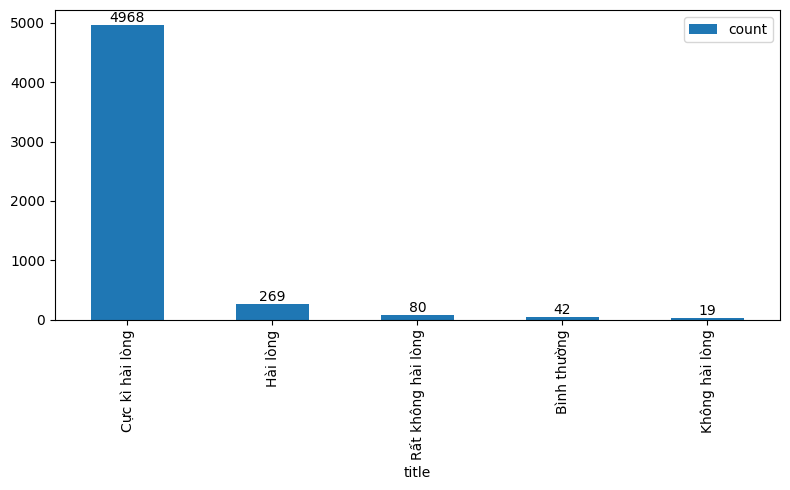

In [ ]:
ax = count_title.plot(x='title', y='count', kind='bar', figsize=(8, 5))

# Hiển thị giá trị trên từng cột
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10)

plt.tight_layout()
plt.show()

-

In [ ]:
def autopct_format(pct):
    return ('%1.1f%%' % pct) if pct > 5 else ''

([<matplotlib.patches.Wedge at 0x7d24209ba6d0>,
 [Text(-1.0686313083784749, 0.26082010419695234, 'Cực kì hài lòng'),
  Text(1.0435697368008383, -0.3477962110682481, 'Hài lòng'),
  Text(1.0923753807033934, -0.12929047773566596, 'Rất không hài lòng'),
  Text(1.0988112433584525, -0.05112583954373625, 'Bình thường'),
  Text(1.099933514344707, -0.012093966318050943, 'Không hài lòng')],
 [Text(-0.5828898045700771, 0.1422655113801558, '92.4%'),
  Text(0.5692198564368208, -0.1897070242190444, '5.0%'),
  Text(0.5958411167473054, -0.0705220787649087, ''),
  Text(0.5993515872864286, -0.027886821569310678, ''),
  Text(0.5999637350971129, -0.00659670890075506, '')])

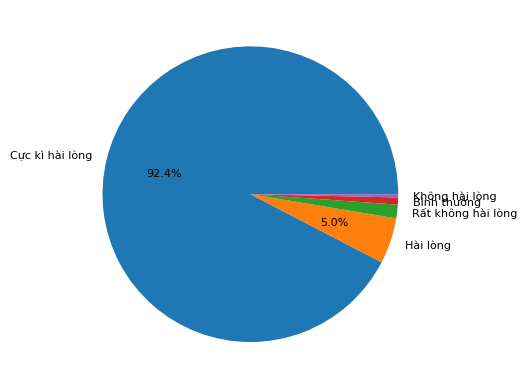

In [ ]:
plt.pie(x=count_title['%'], labels=count_title['title'], autopct=autopct_format, textprops={'fontsize': 8})

- Trong năm 5378 đánh giá sản phẩm thì có 5237 chiếm 97,4% là đánh giá rất hài lòng và hài lòng về sản phẩm, trong đó chiếm 92.5% là đánh giá rất hài lòng --> cho thấy sản phẩm của tiki nhận được sự hài lòng rất lớn từ khách hàng
- Chỉ có khoảng 2,6% là các đánh giá không hài lòng hoặc bình thường từ khách hàng

# Câu 2: Các khía cạnh tích cực và tiêu cực mà khách hàng phản hồi

In [ ]:
df_commnets_v2

,id_comment,title,content,tich cuc,tieu cuc,trung tinh,rating,id_product,timeline
0,20097857,Cực kì hài lòng,"Máy nhìn đẹp, cầm hơi nhẹ, hy vọng tốt.",thiet ke dep,nan,khoi luong nhe,5,277776275,2025-03-17
1,20108525,Cực kì hài lòng,Cam ứng và nhận dien văn tay khá kém tuy nhiên...,bao bi tot,"cam ung kem, nhan dien van tay kem",nan,5,277776275,2025-04-10
2,20032217,Cực kì hài lòng,Giá thành vậy ko mong gì hơn. Cảm ơn tiki.,san pham tot,nan,nan,5,277776275,2024-11-16
3,20086195,Cực kì hài lòng,NaN,nan,nan,nan,5,277776275,2025-02-23
4,20061373,Cực kì hài lòng,"Tôi đã nhận được điện thoại cần mua, rất ok, c...",san pham tot,nan,nan,5,277776275,2025-01-06
...,...,...,...,...,...,...,...,...,...
5393,20037868,Rất không hài lòng,Mô tả thông tin không rõ ràng. Mua nhầm.,nan,mo ta san pham,nan,1,214756058,2024-11-26
5394,20055155,Hài lòng,"thank you, good",nan,nan,nan,4,214756058,2024-12-25
5395,18783171,Hài lòng,Sản phẩm tốt,san pham tot,nan,nan,4,214756058,2023-02-11
5396,19681482,Hài lòng,NaN,nan,nan,nan,4,214756058,2023-12-13


In [ ]:
df_commnets_v2['tich cuc'] = df_commnets_v2['tich cuc'].str.split(',').apply(lambda lst: [x.strip() for x in lst])
df_commnets_v2['tieu cuc'] = df_commnets_v2['tieu cuc'].str.split(',').apply(lambda lst: [x.strip() for x in lst])

<ipython-input-50-71d69fa8f1ea>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_commnets_v2['tich cuc'] = df_commnets_v2['tich cuc'].str.split(',').apply(lambda lst: [x.strip() for x in lst])
<ipython-input-50-71d69fa8f1ea>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_commnets_v2['tieu cuc'] = df_commnets_v2['tieu cuc'].str.split(',').apply(lambda lst: [x.strip() for x in lst])


In [ ]:
df_commnets_v2

,id_comment,title,content,tich cuc,tieu cuc,trung tinh,rating,id_product,timeline
0,20097857,Cực kì hài lòng,"Máy nhìn đẹp, cầm hơi nhẹ, hy vọng tốt.",[thiet ke dep],[nan],khoi luong nhe,5,277776275,2025-03-17
1,20108525,Cực kì hài lòng,Cam ứng và nhận dien văn tay khá kém tuy nhiên...,[bao bi tot],"[cam ung kem, nhan dien van tay kem]",nan,5,277776275,2025-04-10
2,20032217,Cực kì hài lòng,Giá thành vậy ko mong gì hơn. Cảm ơn tiki.,[san pham tot],[nan],nan,5,277776275,2024-11-16
3,20086195,Cực kì hài lòng,NaN,[nan],[nan],nan,5,277776275,2025-02-23
4,20061373,Cực kì hài lòng,"Tôi đã nhận được điện thoại cần mua, rất ok, c...",[san pham tot],[nan],nan,5,277776275,2025-01-06
...,...,...,...,...,...,...,...,...,...
5393,20037868,Rất không hài lòng,Mô tả thông tin không rõ ràng. Mua nhầm.,[nan],[mo ta san pham],nan,1,214756058,2024-11-26
5394,20055155,Hài lòng,"thank you, good",[nan],[nan],nan,4,214756058,2024-12-25
5395,18783171,Hài lòng,Sản phẩm tốt,[san pham tot],[nan],nan,4,214756058,2023-02-11
5396,19681482,Hài lòng,NaN,[nan],[nan],nan,4,214756058,2023-12-13


In [ ]:
aspect_sentiment = list()
aspect_sentiment_unique = set()
for item in df_commnets_v2['tich cuc']:
  for i2 in item:
    if i2 != 'nan':
      aspect_sentiment_unique.add(i2)
      aspect_sentiment.append(i2)
print(aspect_sentiment)

['thiet ke dep', 'bao bi tot', 'san pham tot', 'san pham tot', 'san pham tot trong tam gia', 'san pham tot', 'san pham tot', 'san pham tot', 'san pham tot trong tam gia', 'giao hang nhanh', 'gia tot', 'thiet ke dep', 'san pham tot', 'dong goi can than', 'giao hang nhanh', 'san pham tot', 'san pham tot trong tam gia', 'giao hang nhanh', 'thiet ke dep', 'khoi luong nhe', 'san pham tot trong tam gia', 'san pham tot', 'san pham tot', 'san pham tot', 'giao hang dung hen', 'thiet ke dep', 'thiet ke dep', 'san pham tot', 'giao hang nhanh', 'thiet ke dep', 'giao hang nhanh', 'san pham chinh hang', 'thiet ke dep', 'giao hang nhanh', 'san pham tot', 'giao hang nhanh', 'giao hang nhanh', 'dong goi can than', 'thiet ke dep', 'giao hang dung hen', 'san pham tot', 'giao hang nhanh', 'dong goi can than', 'san pham tot', 'san pham dung nhu mo ta', 'dong goi can than', 'giao hang nhanh', 'giao hang nhanh', 'san pham tot', 'giao hang nhanh', 'dong goi can than', 'san pham dung nhu mo ta', 'thiet ke dep'

In [ ]:
result = dict()
for i in aspect_sentiment_unique:
  count = 0
  for j in aspect_sentiment:
    if i == j:
      count += 1
  result[i] = count
result

{'': 2,
 'dich vu tot': 21,
 'san pham trung binh': 3,
 'giao hang dung hen': 29,
 'san pham chinh han g': 1,
 'don goi can than': 1,
 'dung san pham': 63,
 'bao mat': 13,
 'san pham on': 10,
 'hieu nang on dinh': 1,
 'san pham gia tot': 1,
 'man hinh sac net': 1,
 'giao hang can than': 1,
 'chuc nang tot': 4,
 'hang nguyen seal': 1,
 'tinh nang': 1,
 'ngoai hinh dep': 5,
 'chat luong tot': 1,
 'san pham tot trong tam gia': 81,
 'dong goi can tha': 1,
 'de dat hang': 1,
 'dich vu cskh tot': 1,
 'pin dung lau': 3,
 'nguyen seal': 197,
 'nhan vien than thien': 1,
 'san pham nguyen ven': 3,
 'gia hop ly': 1,
 'bao hanh tot': 1,
 'bao mat tot': 1,
 'van chuyen can than': 1,
 'giao hang nhannh': 1,
 'san pham toto=': 1,
 'hang chat luong': 1,
 'day du phu kien': 5,
 'tinh nang tot': 1,
 'dong goi chuyen nghiep': 1,
 'san pham tot trong tham gia': 1,
 'san pham chat luong tot': 1,
 'can hang nhanh': 1,
 'giao hang tot': 1,
 'hang dung chat luong': 1,
 'giao hang dung ngay': 1,
 'nhan dung sa

In [ ]:
df_aspect_sentiment = pd.DataFrame(list(result.items()), columns=['aspect sentiment','count'])
df_aspect_sentiment.sort_values(by='count', ascending=False, inplace=True)
df_aspect_sentiment['%'] = round(df_aspect_sentiment['count'] * 100/ df_aspect_sentiment['count'].sum(),2)
df_aspect_sentiment['cumulative_sum'] = df_aspect_sentiment['%'].cumsum()
df_aspect_sentiment.head(20)

,aspect sentiment,count,%,cumulative_sum
83,giao hang nhanh,701,25.57,25.57
84,san pham tot,646,23.56,49.13
80,san pham chinh hang,233,8.50,57.63
79,dong goi can than,219,7.99,65.62
23,nguyen seal,197,7.18,72.80
77,gia tot,138,5.03,77.83
69,san pham dep,136,4.96,82.79
18,san pham tot trong tam gia,81,2.95,85.74
6,dung san pham,63,2.30,88.04
65,thiet ke dep,49,1.79,89.83


<Axes: xlabel='aspect sentiment'>

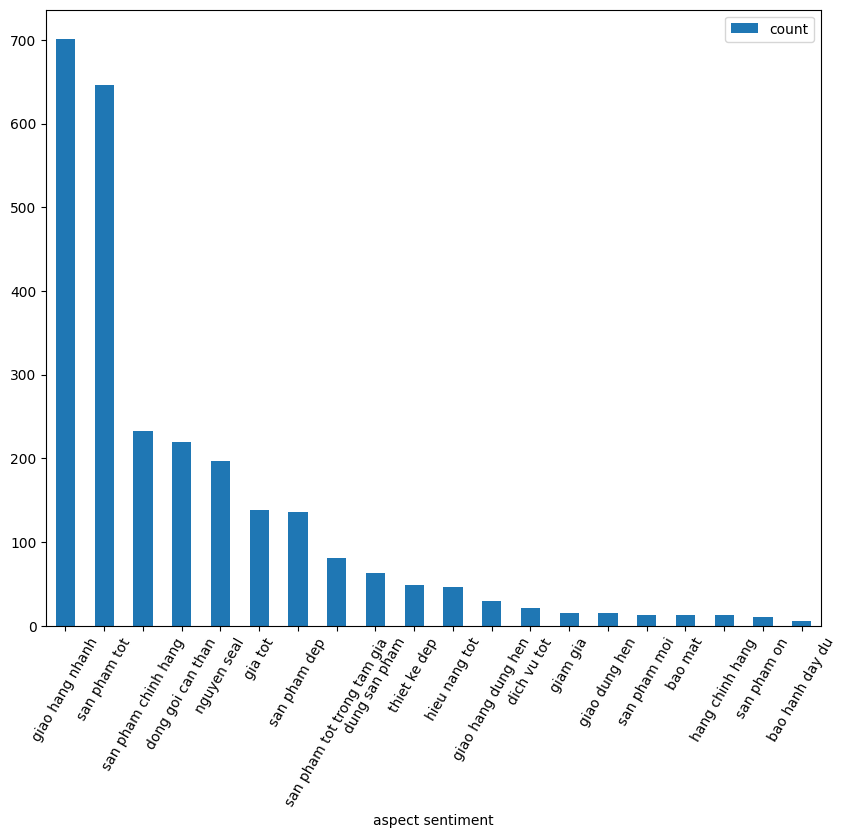

In [ ]:
df_aspect_sentiment.head(20).plot(kind='bar', x = 'aspect sentiment', y='count', figsize=(10,8), rot=60)

- Những khía cạnh tích cực được đánh giá là: giao hàng nhanh, san phẩm tốt, san phẩm chính hãng, đóng gói cẩn thận, nguyên seal, giá tốt ,...

## Câu 3: Những khía cạnh tiêu cực

In [ ]:
aspect_sentiment = list()
aspect_sentiment_unique = set()
for item in df_commnets_v2['tieu cuc']:
  for i2 in item:
    if i2 != 'nan':
      aspect_sentiment_unique.add(i2)
      aspect_sentiment.append(i2)
print(aspect_sentiment)

['cam ung kem', 'nhan dien van tay kem', 'giao hang cham', 'thieu phu kien', 'hieu suat kem', 'doi tra kho', 'san pham loi', 'thieu phu kien', 'thieu phu kien', 'pin nhanh het', 'khong con nguyen seal', 'gui nham phu kien', 'thieu phu kien', 'giao hang cham', 'xuoc man hinh', 'san pham loi', 'dich vu ho tro khong tot', 'giao hang cham', 'san pham loi', 'dich vu tra gop khong tot', 'pin nhanh het', 'giao hang cham', 'do phan giai kem', 'san pham khong tot', 'cham soc khach hang khong tot', 'thong tin san pham chua ro rang', 'giao hang cham', 'hieu nang kem', 'hieu nang kem', 'do hien thi kem', 'shipper khong tra loi', 'dich vu cskh kem', 'hieu nang kem', 'do phan giai kem', 'do phan giai kem', 'giao hang cham', 'hieu nang kem', 'do hien thi kem', 'do hien thi kem', 'man hinh xau', 'loi phan cung', 'loi hien thi', 'loi hien thi', 'trai nghiem chua tot', 'bao hanh', 'thieu phu kien', 'loi cam ung', 'loi man hinh', 'loi man hinh', 'giao hang cham', 'san pham khong moi', 'giao hang cham', '

In [ ]:
result = dict()
for i in aspect_sentiment_unique:
  count = 0
  for j in aspect_sentiment:
    if i == j:
      count += 1
  result[i] = count
result

{'loi phan cung': 1,
 'san pham bi mop': 2,
 'khong nguyen seal': 2,
 'khong cong diem thuong': 3,
 'thong tin san pham chua ro rang': 1,
 'giao cham': 1,
 'giao hang khong can than': 1,
 'may khong moi': 1,
 'cam ung kem': 1,
 'gui nham phu kien': 1,
 'san pham khong tot': 3,
 'dong goi so xai': 2,
 'mo ta san pham': 2,
 'hop bi meo': 3,
 'xuoc man hinh': 1,
 'man hinh xau': 1,
 'chuong trinh khuyen mai': 1,
 'san pham khong nguyen seal': 1,
 'dich vu ho tro khong tot': 1,
 'giao khong dung nguoi': 1,
 'dich vu doi tra khong tot': 1,
 'khong dung san pham': 2,
 'quy trinh nhan hang': 1,
 'san pham loi/hong': 23,
 'bao hanh': 1,
 'san pham bi meo': 1,
 'pin nhanh chai': 1,
 'giao hang lau': 1,
 'gia cao': 2,
 'nhan dien van tay kem': 1,
 'cham soc khach hang khong tot': 1,
 'hieu nang kem': 8,
 'loi cam ung': 1,
 'kich thuoc nho': 2,
 'chinh sach khuyen mai khong ro rang': 1,
 'dich vu kem': 1,
 'dich vu cskh kem': 1,
 'hop khong nguyen ven': 1,
 'san pham loi': 17,
 'tinh nang khong t

In [ ]:
df_aspect_sentiment = pd.DataFrame(list(result.items()), columns=['aspect sentiment','count'])
df_aspect_sentiment.sort_values(by='count', ascending=False, inplace=True)
df_aspect_sentiment['%'] = round(df_aspect_sentiment['count'] * 100/ df_aspect_sentiment['count'].sum(),2)
df_aspect_sentiment['cumulative_sum'] = df_aspect_sentiment['%'].cumsum()
df_aspect_sentiment.head(20)

,aspect sentiment,count,%,cumulative_sum
60,giao hang cham,46,18.4,18.4
23,san pham loi/hong,23,9.2,27.6
67,dong goi khong can than,21,8.4,36.0
38,san pham loi,17,6.8,42.8
49,thieu phu kien,16,6.4,49.2
40,cskh khong tot,14,5.6,54.8
31,hieu nang kem,8,3.2,58.0
41,thieu hoa don,8,3.2,61.2
55,loi man hinh,5,2.0,63.2
44,pin nhanh het,5,2.0,65.2


<Axes: xlabel='aspect sentiment'>

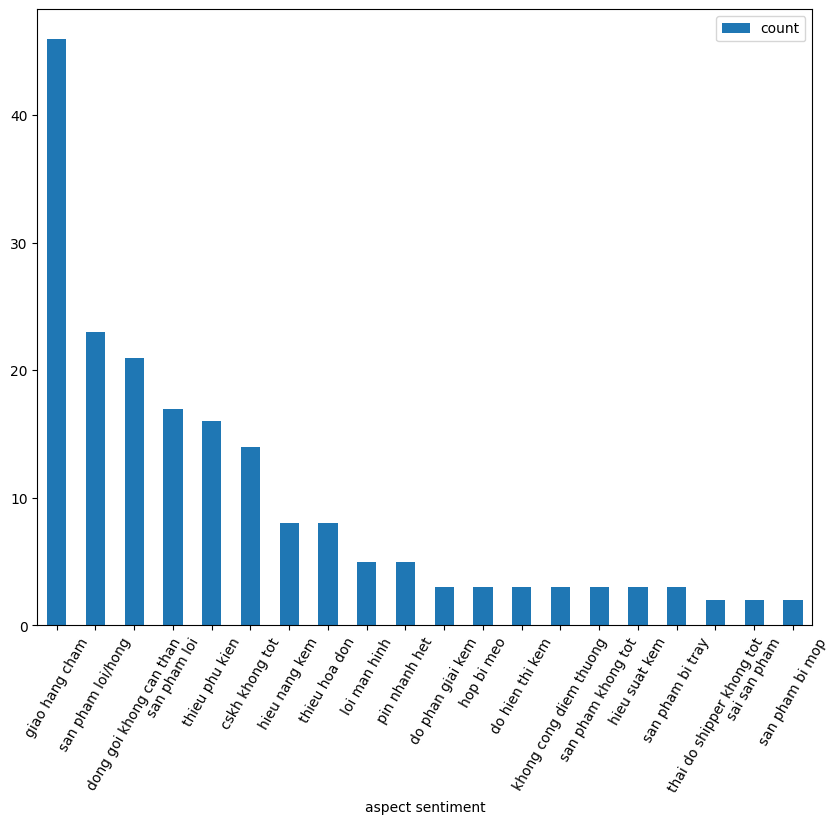

In [ ]:
df_aspect_sentiment.head(20).plot(kind='bar', x = 'aspect sentiment', y='count', figsize=(10,8), rot=60)

- Các khía cạnh mà khách hàng đánh giá tiêu cực: giao hàng chậm, san phẩm lỗi/hỏng, đóng gói không cẩn thận, thiếu phụ kiện đi kèm, cskh không tốt, sản phẩm có hiệu năng kém, thiếu hóa đơn

## Kết luận:


## Điểm mạnh:
- Giao hàng nhanh: đặc biệt với dịch vụ TikiNow
- Sản phẩm chất lượng tốt, chính hãng: thể hiện phần nào cam kết 100% sản phẩm chính hãng của tiki, giúp tăng uy tín trong mắt khách hàng về nguồn hàng
- Đóng gói cẩn thận, nguyên seal: Đảm bảo độ tin cậy trong quy trình xử lý đơn hàng
- Giá tốt: Đối với những mặt hàng giá trị cao việc áp dụng các chính sách khuyến mãi khiến khách hàng cảm thấy giá trị nhận được là hợp lý </br>
⇒ tăng lòng tin, tỷ lệ quay lại mua hàng
## Điểm yếu:
- Giao hàng chậm ở một số khu vực: Điều này có thể do thiếu kho trung chuyển, tài xế hoặc vận hành chưa tối ưu
- Sản phẩm lỗi/hỏng: Có thể do kiểm định chất lượng đầu vào vẫn còn sai sót hoặc lỗi trong quá trình vận chuyển
- Đóng gói không cẩn thận:Có thể bất nguồn từ không đồng đều về quy chuẩn đóng gói giữa các đơn vị/kho hoặc do nhà cung cấp đã không làm đúng quy trình
- Thiếu phụ kiện đi kèm, thiếu hóa đơn: Thiếu sót trong quá trình hoàn thiện đơn hàng.
- CSKH không tốt: Khách hàng không hài lòng với phản hồi, giải quyết khiếu nại </br>
</br>
</br>
Những điểm này đều cho thấy tiki đã tập trung phát triển rất tốt những lợi thế cạnh tranh mà mình đang có như Cam kết hàng chính hãng 100% , Dịch vụ logistics siêu tốc (TikiNOW), Trải nghiệm khách hàng và Định hướng chất lượng thay vì số lượng


# Phương pháp 2 Bag of Works

## Xử lý dữ liệu

In [ ]:
df_commnets

,id_comment,title,content,Positive,Negative,Netural,rating,id_product,timeline
0,20097857,Cực kì hài lòng,"Máy nhìn đẹp, cầm hơi nhẹ, hy vọng tốt.",Thiết kế đẹp,NaN,Khối lượng nhẹ,5,277776275,2025-03-17 21:21:56
1,20108525,Cực kì hài lòng,Cam ứng và nhận dien văn tay khá kém tuy nhiên...,Bao bì tốt,"Cảm ứng kém, Nhận diện vân tay kém",NaN,5,277776275,2025-04-10 07:11:59
2,20032217,Cực kì hài lòng,Giá thành vậy ko mong gì hơn. Cảm ơn tiki.,Sản phẩm tốt,NaN,NaN,5,277776275,2024-11-16 23:50:38
3,20086195,Cực kì hài lòng,NaN,NaN,NaN,NaN,5,277776275,2025-02-23 10:55:37
4,20061373,Cực kì hài lòng,"Tôi đã nhận được điện thoại cần mua, rất ok, c...",Sản phẩm tốt,NaN,NaN,5,277776275,2025-01-06 11:40:36
...,...,...,...,...,...,...,...,...,...
5393,20037868,Rất không hài lòng,Mô tả thông tin không rõ ràng. Mua nhầm.,NaN,mo ta san pham,NaN,1,214756058,2024-11-26 20:28:53
5394,20055155,Hài lòng,"thank you, good",NaN,NaN,NaN,4,214756058,2024-12-25 09:37:59
5395,18783171,Hài lòng,Sản phẩm tốt,san pham tot,NaN,NaN,4,214756058,2023-02-11 17:04:50
5396,19681482,Hài lòng,NaN,NaN,NaN,NaN,4,214756058,2023-12-13 21:16:33


In [ ]:
# Kiểm tra các bản ghi bị lặp
df_commnets[df_commnets.duplicated()]

,id_comment,title,content,Positive,Negative,Netural,rating,id_product,timeline


<Axes: >

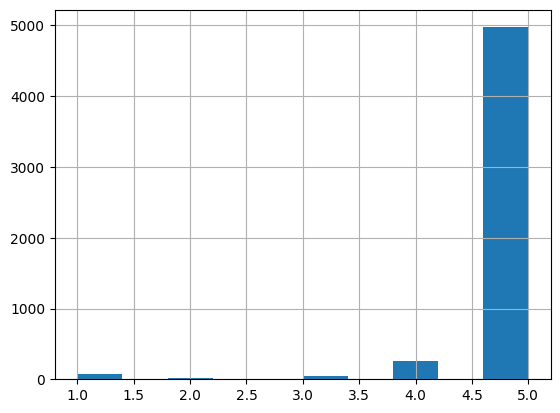

In [ ]:
# trường rating có giá trị ngoại lai nào không
df_commnets['rating'].hist()

In [ ]:
df_commnets['rating'].unique()

array([5, 4, 1, 3, 2])

In [ ]:
df_commnets['title'].unique()

array(['Cực kì hài lòng', 'Hài lòng', 'Rất không hài lòng', 'Bình thường',
       'Không hài lòng', 'Nên mua', 'Perfect', 'Chất lượng tốt',
       'Hàng chất lượng', 'Điện thoại dùng tốt', 'Hàng Chất Lượng',
       'Tạm chấp nhận được', 'Hàng dùng tốt, giao hànglaau',
       'Rất chuyên nghiệp', 'Sản phẩm tốt', 'Thực sự hài lòng', 'Good',
       'điện thoại đẹp', 'HÀNG ĐẸP', 'Rất hài lòng',
       'Không có ống nghe nói', 'Ok', 'Điện thoai bàn Panasonic tốt',
       'Giao hàng nhanh, hàng chính hãng'], dtype=object)

Thông thường tiêu đề của các đánh giá sản phẩm sẽ nằm trong năm giá trị ['Cực kì hài lòng', 'Hài lòng', 'Bình thường', 'Không hài lòng', 'Rất không hài lòng'] và trong data năm giá trị này cũng chiếm phần lớn giá trị --> các giá trị còn lại sẽ bị loại bỏ chỉ giữ lại 5 giá trị này

In [3]:
title_common = ['Cực kì hài lòng', 'Hài lòng', 'Bình thường', 'Không hài lòng', 'Rất không hài lòng']
df_commnets = df_commnets[df_commnets['title'].isin(title_common)]
df_commnets

,id_comment,title,content,Positive,Negative,Netural,rating,id_product,timeline
0,20097857,Cực kì hài lòng,"Máy nhìn đẹp, cầm hơi nhẹ, hy vọng tốt.",Thiết kế đẹp,NaN,Khối lượng nhẹ,5,277776275,2025-03-17 21:21:56
1,20108525,Cực kì hài lòng,Cam ứng và nhận dien văn tay khá kém tuy nhiên...,Bao bì tốt,"Cảm ứng kém, Nhận diện vân tay kém",NaN,5,277776275,2025-04-10 07:11:59
2,20032217,Cực kì hài lòng,Giá thành vậy ko mong gì hơn. Cảm ơn tiki.,Sản phẩm tốt,NaN,NaN,5,277776275,2024-11-16 23:50:38
3,20086195,Cực kì hài lòng,NaN,NaN,NaN,NaN,5,277776275,2025-02-23 10:55:37
4,20061373,Cực kì hài lòng,"Tôi đã nhận được điện thoại cần mua, rất ok, c...",Sản phẩm tốt,NaN,NaN,5,277776275,2025-01-06 11:40:36
...,...,...,...,...,...,...,...,...,...
5393,20037868,Rất không hài lòng,Mô tả thông tin không rõ ràng. Mua nhầm.,NaN,mo ta san pham,NaN,1,214756058,2024-11-26 20:28:53
5394,20055155,Hài lòng,"thank you, good",NaN,NaN,NaN,4,214756058,2024-12-25 09:37:59
5395,18783171,Hài lòng,Sản phẩm tốt,san pham tot,NaN,NaN,4,214756058,2023-02-11 17:04:50
5396,19681482,Hài lòng,NaN,NaN,NaN,NaN,4,214756058,2023-12-13 21:16:33


Do mục đích của bài phân tích này là phân tích các khía cạnh về dịch vụ và sản phẩm mà Tiki cung cấp nên các đánh giá mà không có nội dung sẽ vẫn giữ nguyên giá trị rỗng mà không thay thế

In [4]:
import re
import string
# loại bỏ các biểu tượng cảm xúc
def nomalize_emoji(sent):
    emoji_pattern = re.compile("["
                u"\U0001F600-\U0001F64F"  # emoticons
                u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                u"\U0001F680-\U0001F6FF"  # transport & map symbols
                u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                u"\U00002702-\U000027B0"
                u"\U000024C2-\U0001F251"
                u"\U0001f926-\U0001f937"
                u'\U00010000-\U0010ffff'
                u"\u200d"
                u"\u2640-\u2642"
                u"\u2600-\u2B55"
                u"\u23cf"
                u"\u23e9"
                u"\u231a"
                u"\u3030"
                u"\ufe0f"
    "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', sent)
# thay thế giá trị tiền --> giá
def normalize_money(sent):
    return re.sub(r'[0-9]+[.,0-9][k-m-b]', 'giá', sent)
# thay thế các hashtag
def normalize_hastag(sent):
    return re.sub(r'#+\w+', 'tag', sent)
# thay thế đường dẫn --> website
def normalize_website(sent):
    result = re.sub(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', 'website', sent)
    return re.sub(r'\w+(\.(com|vn|me))+((\/+([\.\w\_\-]+)?)+)?', 'website', result)
def normalize_acronyms(sent):
    text = sent
    replace_list = {
        'ô kêi': ' ok ', 'okie': ' ok ', ' o kê ': ' ok ',
        'okey': ' ok ', 'ôkê': ' ok ', 'oki': ' ok ', ' oke ':  ' ok ',' okay':' ok ','okê':' ok ',
        ' tks ': u' cám ơn ', 'thks': u' cám ơn ', 'thanks': u' cám ơn ', 'ths': u' cám ơn ', 'thank': u' cám ơn ',
        '⭐': 'star ', '*': 'star ', '🌟': 'star ', '🎉': u' tích cực ',
        'kg ': u' không ','not': u' không ', u' kg ': u' không ', '"k ': u' không ',' kh ':u' không ','kô':u' không ','hok':u' không ',' kp ': u' không phải ',u' kô ': u' không ', '"ko ': u' không ', u' ko ': u' không ', u' k ': u' không ', 'khong': u' không ', u' hok ': u' không ',
        'he he': ' tích cực ','hehe': ' tích cực ','hihi': ' tích cực ', 'haha': ' tích cực ', 'hjhj': ' tích cực ',
        ' lol ': ' tiêu cực ',' cc ': ' tiêu cực ','cute': u' dễ thương ','huhu': ' tiêu cực ', ' vs ': u' với ', 'wa': ' quá ', 'wá': u' quá', 'j': u' gì ', '“': ' ',
        ' sz ': u' cỡ ', 'size': u' cỡ ', u' đx ': u' được ', 'dk': u' được ', 'dc': u' được ', 'đk': u' được ',
        'đc': u' được ','authentic': u' chuẩn chính hãng ',u' aut ': u' chuẩn chính hãng ', u' auth ': u' chuẩn chính hãng ', 'thick': u' tích cực ', 'store': u' cửa hàng ',
        'shop': u' cửa hàng ', 'sp': u' sản phẩm ', 'gud': u' tốt ','god': u' tốt ','wel done':' tốt ', 'good': u' tốt ', 'gút': u' tốt ',
        'sấu': u' xấu ','gut': u' tốt ', u' tot ': u' tốt ', u' nice ': u' tốt ', 'perfect': 'rất tốt', 'bt': u' bình thường ',
        'time': u' thời gian ', 'qá': u' quá ', u' ship ': u' giao hàng ', u' m ': u' mình ', u' mik ': u' mình ',
        'ể': 'ể', 'product': 'sản phẩm', 'quality': 'chất lượng','chat':' chất ', 'excelent': 'hoàn hảo', 'bad': 'tệ','fresh': ' tươi ','sad': ' tệ ',
        'date': u' hạn sử dụng ', 'hsd': u' hạn sử dụng ','quickly': u' nhanh ', 'quick': u' nhanh ','fast': u' nhanh ','delivery': u' giao hàng ',u' síp ': u' giao hàng ',
        'beautiful': u' đẹp tuyệt vời ', u' tl ': u' trả lời ', u' r ': u' rồi ', u' shopE ': u' cửa hàng ',u' order ': u' đặt hàng ',
        'chất lg': u' chất lượng ',u' sd ': u' sử dụng ',u' dt ': u' điện thoại ',u' nt ': u' nhắn tin ',u' tl ': u' trả lời ',u' sài ': u' xài ',u'bjo':u' bao giờ ',
        'thik': u' thích ',u' sop ': u' cửa hàng ', ' fb ': ' facebook ', ' face ': ' facebook ', ' very ': u' rất ',u'quả ng ':u' quảng  ',
        'dep': u' đẹp ',u' xau ': u' xấu ','delicious': u' ngon ', u'hàg': u' hàng ', u'qủa': u' quả ',
        'iu': u' yêu ','fake': u' giả mạo ', 'trl': 'trả lời', '><': u' tích cực ',
        ' por ': u' tệ ',' poor ': u' tệ ', 'ib':u' nhắn tin ', 'rep':u' trả lời ',u'fback':' feedback ','fedback':' feedback ', 'ngon':'tốt'
    }
    for k, v in replace_list.items():
        text = text.replace(k, v)
    return text
# remove dấu cuối câu
def normalize_punctuation(sent):
    for char in string.punctuation:
      sent = sent.replace(char, '')
    return sent

# remove dấu câu của các từ
def remove_accents(input_str):
    s1 = u'ÀÁÂÃÈÉÊÌÍÒÓÔÕÙÚÝàáâãèéêìíòóôõùúýĂăĐđĨĩŨũƠơƯưẠạẢảẤấẦầẨẩẪẫẬậẮắẰằẲẳẴẵẶặẸẹẺẻẼẽẾếỀềỂểỄễỆệỈỉỊịỌọỎỏỐốỒồỔổỖỗỘộỚớỜờỞởỠỡỢợỤụỦủỨứỪừỬửỮữỰựỲỳỴỵỶỷỸỹ'
    s0 = u'AAAAEEEIIOOOOUUYaaaaeeeiioooouuyAaDdIiUuOoUuAaAaAaAaAaAaAaAaAaAaAaAaEeEeEeEeEeEeEeEeIiIiOoOoOoOoOoOoOoOoOoOoOoOoUuUuUuUuUuUuUuYyYyYyYy'
    s = ''
    for c in input_str:
      if c in s1:
        s += s0[s1.index(c)]
      else:
        s += c
    return s

In [ ]:
df_commnets.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5378 entries, 0 to 5397
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id_comment  5378 non-null   int64 
 1   title       5378 non-null   object
 2   content     2184 non-null   object
 3   Positive    1680 non-null   object
 4   Negative    225 non-null    object
 5   Netural     23 non-null     object
 6   rating      5378 non-null   int64 
 7   id_product  5378 non-null   int64 
 8   timeline    5356 non-null   object
dtypes: int64(3), object(6)
memory usage: 549.2+ KB


In [5]:
df_commnets['content'] = df_commnets['content'].astype(str)

<ipython-input-5-2955909371>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_commnets['content'] = df_commnets['content'].astype(str)


In [6]:
# Loại bỏ các emoij
df_commnets['comment_processed'] = df_commnets['content'].apply(nomalize_emoji)
# Chuẩn hóa các hashtag
df_commnets['comment_processed'] = df_commnets['comment_processed'].apply(normalize_hastag)
# Chuẩn hóa đường dẫn
df_commnets['comment_processed'] = df_commnets['comment_processed'].apply(normalize_website)
# Loại bỏ dấu câu
df_commnets['comment_processed'] = df_commnets['comment_processed'].apply(normalize_punctuation)
# Chuẩn hóa từ viết tắt
df_commnets['comment_processed'] = df_commnets['comment_processed'].apply(normalize_acronyms)
# Chuyển toàn bộ về chữ thường
df_commnets['comment_processed'] = df_commnets['comment_processed'].str.lower()
# Bỏ dấu câu
df_commnets['comment_processed'] = df_commnets['comment_processed'].apply(remove_accents)
df_commnets

<ipython-input-6-1901499273>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_commnets['comment_processed'] = df_commnets['content'].apply(nomalize_emoji)
<ipython-input-6-1901499273>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_commnets['comment_processed'] = df_commnets['comment_processed'].apply(normalize_hastag)
<ipython-input-6-1901499273>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

,id_comment,title,content,Positive,Negative,Netural,rating,id_product,timeline,comment_processed
0,20097857,Cực kì hài lòng,"Máy nhìn đẹp, cầm hơi nhẹ, hy vọng tốt.",Thiết kế đẹp,NaN,Khối lượng nhẹ,5,277776275,2025-03-17 21:21:56,may nhin dep cam hoi nhe hy vong tot
1,20108525,Cực kì hài lòng,Cam ứng và nhận dien văn tay khá kém tuy nhiên...,Bao bì tốt,"Cảm ứng kém, Nhận diện vân tay kém",NaN,5,277776275,2025-04-10 07:11:59,cam ung va nhan dien van tay kha kem tuy nhien...
2,20032217,Cực kì hài lòng,Giá thành vậy ko mong gì hơn. Cảm ơn tiki.,Sản phẩm tốt,NaN,NaN,5,277776275,2024-11-16 23:50:38,gia thanh vay khong mong gi hon cam on tiki
3,20086195,Cực kì hài lòng,nan,NaN,NaN,NaN,5,277776275,2025-02-23 10:55:37,nan
4,20061373,Cực kì hài lòng,"Tôi đã nhận được điện thoại cần mua, rất ok, c...",Sản phẩm tốt,NaN,NaN,5,277776275,2025-01-06 11:40:36,toi da nhan duoc dien thoai can mua rat ok cam...
...,...,...,...,...,...,...,...,...,...,...
5393,20037868,Rất không hài lòng,Mô tả thông tin không rõ ràng. Mua nhầm.,NaN,mo ta san pham,NaN,1,214756058,2024-11-26 20:28:53,mo ta thong tin khong ro rang mua nham
5394,20055155,Hài lòng,"thank you, good",NaN,NaN,NaN,4,214756058,2024-12-25 09:37:59,cam on you tot
5395,18783171,Hài lòng,Sản phẩm tốt,san pham tot,NaN,NaN,4,214756058,2023-02-11 17:04:50,san pham tot
5396,19681482,Hài lòng,nan,NaN,NaN,NaN,4,214756058,2023-12-13 21:16:33,nan


In [7]:
# loại bỏ các đánh giá không có nội dung
df_commnets = df_commnets[df_commnets['content'].notnull()]
df_commnets

,id_comment,title,content,Positive,Negative,Netural,rating,id_product,timeline,comment_processed
0,20097857,Cực kì hài lòng,"Máy nhìn đẹp, cầm hơi nhẹ, hy vọng tốt.",Thiết kế đẹp,NaN,Khối lượng nhẹ,5,277776275,2025-03-17 21:21:56,may nhin dep cam hoi nhe hy vong tot
1,20108525,Cực kì hài lòng,Cam ứng và nhận dien văn tay khá kém tuy nhiên...,Bao bì tốt,"Cảm ứng kém, Nhận diện vân tay kém",NaN,5,277776275,2025-04-10 07:11:59,cam ung va nhan dien van tay kha kem tuy nhien...
2,20032217,Cực kì hài lòng,Giá thành vậy ko mong gì hơn. Cảm ơn tiki.,Sản phẩm tốt,NaN,NaN,5,277776275,2024-11-16 23:50:38,gia thanh vay khong mong gi hon cam on tiki
3,20086195,Cực kì hài lòng,nan,NaN,NaN,NaN,5,277776275,2025-02-23 10:55:37,nan
4,20061373,Cực kì hài lòng,"Tôi đã nhận được điện thoại cần mua, rất ok, c...",Sản phẩm tốt,NaN,NaN,5,277776275,2025-01-06 11:40:36,toi da nhan duoc dien thoai can mua rat ok cam...
...,...,...,...,...,...,...,...,...,...,...
5393,20037868,Rất không hài lòng,Mô tả thông tin không rõ ràng. Mua nhầm.,NaN,mo ta san pham,NaN,1,214756058,2024-11-26 20:28:53,mo ta thong tin khong ro rang mua nham
5394,20055155,Hài lòng,"thank you, good",NaN,NaN,NaN,4,214756058,2024-12-25 09:37:59,cam on you tot
5395,18783171,Hài lòng,Sản phẩm tốt,san pham tot,NaN,NaN,4,214756058,2023-02-11 17:04:50,san pham tot
5396,19681482,Hài lòng,nan,NaN,NaN,NaN,4,214756058,2023-12-13 21:16:33,nan


In [ ]:
df_commnets['comment_processed']

,comment_processed
0,may nhin dep cam hoi nhe hy vong tot
1,cam ung va nhan dien van tay kha kem tuy nhien...
2,gia thanh vay khong mong gi hon cam on tiki
3,nan
4,toi da nhan duoc dien thoai can mua rat ok cam...
...,...
5393,mo ta thong tin khong ro rang mua nham
5394,cam on you tot
5395,san pham tot
5396,nan


In [8]:
def two_gram(arr_token):
    result = []
    for i in range(len(arr_token)):
        if i < len(arr_token) - 1:
          temp = arr_token[i] +' '+ arr_token[i+1]
          result.append(temp)
    return result

In [9]:
def three_gram(arr_token):
    result = []
    for i in range(len(arr_token)):
        if i < len(arr_token) - 2:
          temp = arr_token[i] + ' ' + arr_token[i+1] + ' ' + arr_token[i+2]
          result.append(temp)
    return result

In [10]:
def get_arr_token(str_sample):
    result = []
    arr_token = str_sample.split(' ')
    two = two_gram(arr_token)
    three = three_gram(arr_token)
    for i in arr_token:
      result.append(i)
    for i in two:
      result.append(i)
    for i in three:
      result.append(i)
    return result

In [11]:
df_commnets['array token'] = df_commnets['comment_processed'].apply(get_arr_token)
df_commnets

,id_comment,title,content,Positive,Negative,Netural,rating,id_product,timeline,comment_processed,array token
0,20097857,Cực kì hài lòng,"Máy nhìn đẹp, cầm hơi nhẹ, hy vọng tốt.",Thiết kế đẹp,NaN,Khối lượng nhẹ,5,277776275,2025-03-17 21:21:56,may nhin dep cam hoi nhe hy vong tot,"[may, nhin, dep, cam, hoi, nhe, hy, vong, tot,..."
1,20108525,Cực kì hài lòng,Cam ứng và nhận dien văn tay khá kém tuy nhiên...,Bao bì tốt,"Cảm ứng kém, Nhận diện vân tay kém",NaN,5,277776275,2025-04-10 07:11:59,cam ung va nhan dien van tay kha kem tuy nhien...,"[cam, ung, va, nhan, dien, van, tay, kha, kem,..."
2,20032217,Cực kì hài lòng,Giá thành vậy ko mong gì hơn. Cảm ơn tiki.,Sản phẩm tốt,NaN,NaN,5,277776275,2024-11-16 23:50:38,gia thanh vay khong mong gi hon cam on tiki,"[gia, thanh, vay, khong, mong, gi, hon, cam, o..."
3,20086195,Cực kì hài lòng,nan,NaN,NaN,NaN,5,277776275,2025-02-23 10:55:37,nan,[nan]
4,20061373,Cực kì hài lòng,"Tôi đã nhận được điện thoại cần mua, rất ok, c...",Sản phẩm tốt,NaN,NaN,5,277776275,2025-01-06 11:40:36,toi da nhan duoc dien thoai can mua rat ok cam...,"[toi, da, nhan, duoc, dien, thoai, can, mua, r..."
...,...,...,...,...,...,...,...,...,...,...,...
5393,20037868,Rất không hài lòng,Mô tả thông tin không rõ ràng. Mua nhầm.,NaN,mo ta san pham,NaN,1,214756058,2024-11-26 20:28:53,mo ta thong tin khong ro rang mua nham,"[mo, ta, thong, tin, khong, ro, rang, mua, nha..."
5394,20055155,Hài lòng,"thank you, good",NaN,NaN,NaN,4,214756058,2024-12-25 09:37:59,cam on you tot,"[, cam, on, , you, , tot, , cam, cam on, on ,..."
5395,18783171,Hài lòng,Sản phẩm tốt,san pham tot,NaN,NaN,4,214756058,2023-02-11 17:04:50,san pham tot,"[san, pham, tot, san pham, pham tot, san pham ..."
5396,19681482,Hài lòng,nan,NaN,NaN,NaN,4,214756058,2023-12-13 21:16:33,nan,[nan]


In [29]:
vocabulary = [
    # HIỆU NĂNG & TỐC ĐỘ
    'nhanh', 'muot', 'lag', 'giat', 'do', 'ram', 'chip', 'snapdragon', 'exynos', 'mediatek',
    'hieu nang', 'xu ly', 'da nhiem', 'toc do', 'hieu suat', 'tan nhiet', 'overheat', 'gaming',
    'app', 'ung dung', 'choi game muot', 'luot web nhanh', 'mo app cham', 'ram ao', 'chip xu ly',

    # MÀN HÌNH
    'sang', 'toi', 'mau', 'do phan giai', 'full hd', '4k', '60hz', '120hz', 'ips', 'oled',
    'amoled', 'retina', 'goc nhin', 'cam ung', 'mong', 'vien', 'tam nen', 'be', 'ran',
    'chong loa', 'mau sac chan thuc', 'man sac net', 'nhin khong moi mat', 'cam ung nhay',
    'mat kinh cuong luc',

    # PIN & SẠC
    'pin', 'sac', 'trau', 'nhanh', 'chai', 'tut', 'dung luong', 'mah', 'sac khong day',
    'sac nhanh', 'tiet kiem', 'ngon pin', 'sac day', 'tuoi tho pin', 'dung ca ngay',
    'sac 1 tieng', 'pin yeu', 'sac kem may', 'chai pin sau 6 thang',

    # CAMERA
    'camera', 'chup', 'selfie', 'anh', 'mo', 'net', 'zoom', 'khau do', 'hdr', 'ai',
    'chong rung', 'goc rong', 'macro', 'xoa phong', 'mau sac', 'anh sang', 'den flash',
    'quay phim', 'chup dem dep', 'lay net kem', 'mau anh that', 'camera giat lag',
    'tinh nang chuyen nghiep',

    # THIẾT KẾ & CHẤT LƯỢNG
    'dep', 'xau', 'sang', 'nhua', 'kim loai', 'kinh', 'mong', 'nhe', 'day', 'cam chac',
    'truot', 'van tay', 'khang nuoc', 'ip68', 'cam bien', 'nut', 'phim', 'mau sac',
    'thiet ke mong nhe', 'hoan thien cao cap', 'de tray xuoc', 'bam van tay',
    'cam giac re tien',

    # ÂM THANH
    'loa', 'am luong', 'chat am', 'bass', 'treble', 'can bang', 're', 'nhieu', 'jack 3.5mm',
    'bluetooth', 'loa kep', 'dolby', 'micro', 'goi thoai', 'nghe ro', 'am thanh to ro',
    'nghe nhac hay', 'loa yeu', 'giat tieng khi nghe', 'mic thu khong tot',

    # HỆ ĐIỀU HÀNH
    'android', 'ios', 'giao dien', 'cap nhat', 'bao mat', 'virus', 'bloatware', 'tu bien',
    'muot', 'loi', 'giao dien', 'cai dat', 'ho tro', 'phien ban', 'de su dung',
    'nhieu bloatware', 'cap nhat bao mat', 'giao dien than thien', 'loi phan mem',

    # GIÁ CẢ
    'dat', 're', 'hoi', 'gia', 'khuyen mai', 'tra gop', 'bao hanh', 'doi tra', 'hoan tien',
    'uu dai', 'phi van chuyen', 'gia tri', 'xung dang', 'chinh hang', 'fake', 'gia tot',
    'khuyen mai hap dan', 'bao hanh de dang', 'dat hon noi khac', 'gia re so voi chat luong',

    # DỊCH VỤ
    'giao hang', 'dong goi', 'shipper', 'nhanh', 'cham', 'ho tro', 'tu van', 'dong hop',
    'phu kien', 'sach huong dan', 'cap', 'cu sac', 'hang cu', 'hang moi', 'seal', 'nguyen seal'
    'giao hang nhanh', 'dong goi can than', 'shipper than thien', 'thieu phu kien',
    'hang khong seal',

    # ĐỘ BỀN
    'ben', 'hong', 'vo', 'tray', 'oxi hoa', 'bao hanh', 'sua chua', 'trung tam bh',
    'loi phan cung', 'chinh hang', 'het han bh', 'tut pin', 'chai pin',
    'su dung 2 nam khong hong', 'bao hanh nhanh', 'may yeu sau update', 'loi vat sau 1 thang',
    # TỔNG QUAN
    'tot','san pham tot'
]


Lấy ra các đánh giá có title là "Rất hài lòng", "Hài Lòng" để phân tích các khía cạnh tích cực và tiêu cực trong đánh giá

In [20]:
df_commnets['title'].unique()

array(['Cực kì hài lòng', 'Hài lòng', 'Rất không hài lòng', 'Bình thường',
       'Không hài lòng'], dtype=object)

In [30]:
df_comment_positive = df_commnets[df_commnets['title'].isin(['Cực kì hài lòng','Hài lòng'])]
df_comment_positive

,id_comment,title,content,Positive,Negative,Netural,rating,id_product,timeline,comment_processed,array token
0,20097857,Cực kì hài lòng,"Máy nhìn đẹp, cầm hơi nhẹ, hy vọng tốt.",Thiết kế đẹp,NaN,Khối lượng nhẹ,5,277776275,2025-03-17 21:21:56,may nhin dep cam hoi nhe hy vong tot,"[may, nhin, dep, cam, hoi, nhe, hy, vong, tot,..."
1,20108525,Cực kì hài lòng,Cam ứng và nhận dien văn tay khá kém tuy nhiên...,Bao bì tốt,"Cảm ứng kém, Nhận diện vân tay kém",NaN,5,277776275,2025-04-10 07:11:59,cam ung va nhan dien van tay kha kem tuy nhien...,"[cam, ung, va, nhan, dien, van, tay, kha, kem,..."
2,20032217,Cực kì hài lòng,Giá thành vậy ko mong gì hơn. Cảm ơn tiki.,Sản phẩm tốt,NaN,NaN,5,277776275,2024-11-16 23:50:38,gia thanh vay khong mong gi hon cam on tiki,"[gia, thanh, vay, khong, mong, gi, hon, cam, o..."
3,20086195,Cực kì hài lòng,nan,NaN,NaN,NaN,5,277776275,2025-02-23 10:55:37,nan,[nan]
4,20061373,Cực kì hài lòng,"Tôi đã nhận được điện thoại cần mua, rất ok, c...",Sản phẩm tốt,NaN,NaN,5,277776275,2025-01-06 11:40:36,toi da nhan duoc dien thoai can mua rat ok cam...,"[toi, da, nhan, duoc, dien, thoai, can, mua, r..."
...,...,...,...,...,...,...,...,...,...,...,...
5392,19815746,Hài lòng,"Cảm giác như pin của máy không được cố định, l...",NaN,san pham loi/hong,NaN,4,214756058,2024-03-22 09:26:17,cam giac nhu pin cua may khong duoc co dinh la...,"[cam, giac, nhu, pin, cua, may, khong, duoc, c..."
5394,20055155,Hài lòng,"thank you, good",NaN,NaN,NaN,4,214756058,2024-12-25 09:37:59,cam on you tot,"[, cam, on, , you, , tot, , cam, cam on, on ,..."
5395,18783171,Hài lòng,Sản phẩm tốt,san pham tot,NaN,NaN,4,214756058,2023-02-11 17:04:50,san pham tot,"[san, pham, tot, san pham, pham tot, san pham ..."
5396,19681482,Hài lòng,nan,NaN,NaN,NaN,4,214756058,2023-12-13 21:16:33,nan,[nan]


In [31]:
# Các khía cạnh được nhắc tới
frequency_word = dict()
for idx, cell in df_comment_positive.iterrows():
    for i in cell['array token']:
      if i in vocabulary:
        if i not in frequency_word:
          frequency_word[i] = 1
        else:
          frequency_word[i] = frequency_word[i] + 1
print(frequency_word)

{'dep': 301, 'hoi': 99, 'nhe': 86, 'tot': 511, 'day': 45, 'cap': 20, 'cam ung': 10, 'van tay': 4, 'gia': 392, 'mong': 19, 'toi': 54, 'sac': 63, 'cu sac': 4, 'khuyen mai': 9, 'pin': 62, 'mau': 116, 'anh': 46, 'nhanh': 701, 'chup': 42, 'sang': 40, 'sac nhanh': 5, 'giao hang': 513, 'dong goi': 202, 'mo': 44, 'chinh hang': 236, 'loi': 34, 'seal': 184, 'hang moi': 18, 'dat': 87, 'hong': 35, 'gia tot': 65, 'cham': 26, 'vo': 18, 'nhieu': 64, 'camera': 26, 'trau': 13, 're': 63, 'giat': 1, 'tray': 3, 'mau sac': 4, 'phim': 14, 'nhua': 1, 'loa': 5, 'do': 132, 'giao dien': 3, 'do phan giai': 9, 'muot': 66, 'cam ung nhay': 2, 'ram': 3, 'ho tro': 9, 'bao hanh': 50, 'ben': 40, 'kinh': 5, 'be': 5, 'lag': 6, 'hieu nang': 2, 'vien': 19, 'toc do': 8, 'da nhiem': 2, 'xau': 4, 'san pham tot': 51, 'gia tri': 54, 'net': 25, 'quay phim': 1, 'phu kien': 7, 'shipper': 29, 'tut': 3, 'tra gop': 12, 'bao mat': 5, 'app': 12, 'xung dang': 6, 'ios': 2, 'hoan tien': 16, 'cam chac': 2, 'chip': 1, 'retina': 2, 'hdr': 1,

In [32]:
df_token = pd.DataFrame(list(frequency_word.items()), columns = ['token', 'count'] )
df_token

,token,count
0,dep,301
1,hoi,99
2,nhe,86
3,tot,511
4,day,45
...,...,...
99,zoom,1
100,nghe ro,1
101,cam bien,1
102,bam van tay,1


In [33]:
df_token['count'].describe()

,count
count,104.000000
mean,47.519231
std,110.885840
min,1.000000
25%,2.000000
50%,7.000000
75%,42.500000
max,701.000000


In [34]:
df_token.sort_values(by = 'count', ascending=False, inplace=True)
df_token.head(30)

,token,count
17,nhanh,701
21,giao hang,513
3,tot,511
8,gia,392
0,dep,301
24,chinh hang,236
22,dong goi,202
26,seal,184
43,do,132
15,mau,116


- nhìn vào kết quả ta có thể thấy một số khía cạnh dịch vụ mà Tiki cung cấp được nhắc đến trong các đánh giá tích cực như: Tốt, Đẹp, Chính hãng, Nhanh, Giá tốt, Bền --> đây có thể là nhắc đến các khía cạnh dịch vụ giao hàng, sản phẩm và được đánh giá là nhanh, sản phẩm chính hãng và sản phẩm tốt

- Các khía cạnh được nhắc đến trong những đánh giá tiêu cực

In [35]:
df_comment_nagative = df_commnets[df_commnets['title'].isin(['Rất không hài lòng','Không hài lòng'])]
df_comment_nagative

,id_comment,title,content,Positive,Negative,Netural,rating,id_product,timeline,comment_processed,array token
25,20092960,Rất không hài lòng,Không như kỳ vọng điện thoại khá dật quá có cậ...,NaN,"Hiệu suất kém, Đổi trả khó",NaN,1,277776275,2025-03-08 16:55:12,khong nhu ky vong dien thoai kha dat qua co ca...,"[khong, nhu, ky, vong, dien, thoai, kha, dat, ..."
74,20114009,Không hài lòng,Sp giao thiếu dây xạc type C.,NaN,Thiếu phụ kiện,NaN,2,276614493,2025-04-21 22:28:48,sp giao thieu day xac type c,"[sp, giao, thieu, day, xac, type, c, sp giao, ..."
330,20000970,Rất không hài lòng,Máy bị lỗi reset. Yêu cầu hỗ trợ thì *** yêu c...,NaN,"sản phẩm lỗi, dịch vụ hỗ trợ không tốt",NaN,1,276109904,2024-10-09 18:51:02,may bi loi reset yeu cau ho tro thi yeu cau c...,"[may, bi, loi, reset, yeu, cau, ho, tro, thi, ..."
332,20110678,Rất không hài lòng,"Mua hàng bị Tiki lửa đảo chiếm đoạt tài sản , ...",NaN,dịch vụ trả góp không tốt,NaN,1,276109904,2025-04-14 20:02:14,mua hang bi tiki lua dao chiem doat tai san m...,"[mua, hang, bi, tiki, lua, dao, chiem, doat, t..."
345,20053945,Rất không hài lòng,Không hài lòng với sản phẩm,NaN,sản phẩm không tốt,NaN,1,275913708,2024-12-23 10:06:42,khong hai long voi san pham,"[khong, hai, long, voi, san, pham, khong hai, ..."
...,...,...,...,...,...,...,...,...,...,...,...
5248,19555351,Rất không hài lòng,"Hộp bị rạch, quá thất vọng về sản phẩm",NaN,dong goi khong can than,NaN,1,179547641,2023-09-27 16:38:27,hop bi rach qua that vong ve san pham,"[hop, bi, rach, qua, that, vong, ve, san, pham..."
5389,19680554,Rất không hài lòng,mô tả ko nói đến bản có quảng cáo. _x000D_\nGi...,NaN,mo ta san pham,NaN,1,214756058,2023-12-13 09:25:09,mo ta khong noi den ban co quang cao x000d\ngi...,"[mo, ta, khong, noi, den, ban, co, quang, cao,..."
5390,19644022,Rất không hài lòng,Không có bao da kèm theo_x000D_\nSau khi tôi m...,NaN,thieu phu kien,NaN,1,214756058,2023-11-13 09:10:31,khong co bao da kem theox000d\nsau khi toi mua...,"[khong, co, bao, da, kem, theox000d\nsau, khi,..."
5391,20053422,Không hài lòng,Sau một thời gian dùng thì bị loạn cảm ứng,NaN,san pham loi/hong,NaN,2,214756058,2024-12-22 10:05:38,sau mot thoi gian dung thi bi loan cam ung,"[sau, mot, thoi, gian, dung, thi, bi, loan, ca..."


In [36]:
# Các khía cạnh được nhắc tới
frequency_word = dict()
for idx, cell in df_comment_nagative.iterrows():
    for i in cell['array token']:
      if i in vocabulary:
        if i not in frequency_word:
          frequency_word[i] = 1
        else:
          frequency_word[i] = frequency_word[i] + 1
print(frequency_word)

{'dat': 7, 'cap': 2, 'gia': 14, 'cap nhat': 1, 'doi tra': 4, 'day': 12, 'loi': 23, 'anh': 6, 'ho tro': 11, 'tra gop': 4, 'vien': 9, 'tot': 4, 'toi': 10, 'seal': 5, 'do': 15, 'giao hang': 22, 'bao hanh': 5, 'mau': 5, 'sac': 10, 'net': 1, 'cham': 13, 'mau sac': 1, 'xu ly': 4, 'hoi': 7, 'ai': 4, 'tu van': 4, 'mo': 13, 'giat': 3, 'cam ung': 2, 'xau': 2, 'nhanh': 4, 'tray': 4, 'gia tri': 4, 'nhieu': 3, 'shipper': 5, 'pin': 5, 'ben': 15, 'hong': 2, 'hoan tien': 5, 'vo': 2, 'camera': 4, 'sang': 4, 'dong goi': 2, 'mong': 3, 'phu kien': 2, 'khuyen mai': 2, 'app': 1, 'micro': 1, 'hang moi': 1, 'dep': 1, 'loi phan mem': 1, 'chinh hang': 1, 'chup': 1, 'lag': 1, 'nhe': 2, 'phim': 1, 'dung luong': 1}


In [37]:
df_token = pd.DataFrame(list(frequency_word.items()), columns = ['token', 'count'] )
df_token

,token,count
0,dat,7
1,cap,2
2,gia,14
3,cap nhat,1
4,doi tra,4
5,day,12
6,loi,23
7,anh,6
8,ho tro,11
9,tra gop,4


In [38]:
df_token.sort_values(by = 'count', ascending=False, inplace=True)
df_token.head(30)

,token,count
6,loi,23
15,giao hang,22
14,do,15
36,ben,15
2,gia,14
26,mo,13
20,cham,13
5,day,12
8,ho tro,11
12,toi,10


- Có thể nhận thấy một các đánh giá tiêu cực nhắc tới các khía cạnh: Lỗi, Giao hàng chậm, Hỗ trợ --> Phân tích sâu hơn khía cạnh Hỗ trợ

In [39]:
df_comment_nagative

,id_comment,title,content,Positive,Negative,Netural,rating,id_product,timeline,comment_processed,array token
25,20092960,Rất không hài lòng,Không như kỳ vọng điện thoại khá dật quá có cậ...,NaN,"Hiệu suất kém, Đổi trả khó",NaN,1,277776275,2025-03-08 16:55:12,khong nhu ky vong dien thoai kha dat qua co ca...,"[khong, nhu, ky, vong, dien, thoai, kha, dat, ..."
74,20114009,Không hài lòng,Sp giao thiếu dây xạc type C.,NaN,Thiếu phụ kiện,NaN,2,276614493,2025-04-21 22:28:48,sp giao thieu day xac type c,"[sp, giao, thieu, day, xac, type, c, sp giao, ..."
330,20000970,Rất không hài lòng,Máy bị lỗi reset. Yêu cầu hỗ trợ thì *** yêu c...,NaN,"sản phẩm lỗi, dịch vụ hỗ trợ không tốt",NaN,1,276109904,2024-10-09 18:51:02,may bi loi reset yeu cau ho tro thi yeu cau c...,"[may, bi, loi, reset, yeu, cau, ho, tro, thi, ..."
332,20110678,Rất không hài lòng,"Mua hàng bị Tiki lửa đảo chiếm đoạt tài sản , ...",NaN,dịch vụ trả góp không tốt,NaN,1,276109904,2025-04-14 20:02:14,mua hang bi tiki lua dao chiem doat tai san m...,"[mua, hang, bi, tiki, lua, dao, chiem, doat, t..."
345,20053945,Rất không hài lòng,Không hài lòng với sản phẩm,NaN,sản phẩm không tốt,NaN,1,275913708,2024-12-23 10:06:42,khong hai long voi san pham,"[khong, hai, long, voi, san, pham, khong hai, ..."
...,...,...,...,...,...,...,...,...,...,...,...
5248,19555351,Rất không hài lòng,"Hộp bị rạch, quá thất vọng về sản phẩm",NaN,dong goi khong can than,NaN,1,179547641,2023-09-27 16:38:27,hop bi rach qua that vong ve san pham,"[hop, bi, rach, qua, that, vong, ve, san, pham..."
5389,19680554,Rất không hài lòng,mô tả ko nói đến bản có quảng cáo. _x000D_\nGi...,NaN,mo ta san pham,NaN,1,214756058,2023-12-13 09:25:09,mo ta khong noi den ban co quang cao x000d\ngi...,"[mo, ta, khong, noi, den, ban, co, quang, cao,..."
5390,19644022,Rất không hài lòng,Không có bao da kèm theo_x000D_\nSau khi tôi m...,NaN,thieu phu kien,NaN,1,214756058,2023-11-13 09:10:31,khong co bao da kem theox000d\nsau khi toi mua...,"[khong, co, bao, da, kem, theox000d\nsau, khi,..."
5391,20053422,Không hài lòng,Sau một thời gian dùng thì bị loạn cảm ứng,NaN,san pham loi/hong,NaN,2,214756058,2024-12-22 10:05:38,sau mot thoi gian dung thi bi loan cam ung,"[sau, mot, thoi, gian, dung, thi, bi, loan, ca..."


In [47]:
for index, cell in df_comment_nagative.iterrows():
  if 'hỗ trợ' in cell['content']:
    print(cell['id_comment'] , cell['content'])

20000970 Máy bị lỗi reset. Yêu cầu hỗ trợ thì *** yêu cầu cung cấp hình ảnh khùng điên gì ko liên quan
20110822 1. Giao hàng nhanh, đúng lịch dự kiến.
2. Sản phẩm bị lỗi từ khúc xuất xưởng: hàng dìa quay clip khui hộp như yêu cầu, nhưng chưa bóc seal, hôm sau đem ra cửa hàng dán màn hình, cửa hàng báo là màn hình bị trầy 1 đường như hình, đã liên hệ Tiki nhờ hỗ trợ giải quyết từ thứ 7 ngày 12/4/2025, đến nay chưa có hồi âm...
19664180 Tốt nhất là các bác nên ra ĐMX hoặc *** mà mua cho nhanh và đảm bảo. Đơn hàng giá trị mà phục vụ quá kém. _x000D_
Tiki hỗ trợ quá kém về phần xuất hóa đơn cho khách hàng.
17407563 mua 1 chiếc điện thoại yêu thích nhưng nó bị lỗi sơn, nhận hàng vào buổi chiều ngày 10, cảm giác ban đầu rất vui rất thích vậy mà tới tối ngày 7 thì phát hiện dưới camera nó 1 đốm trắng nhỏ như chân kim thế mà tưởng bụi sáng vệ sinh lại thì nó lan ra như trốc sơn, thì ra ngày 8 mất rồi, báo lại Tiki thì đại diện kỹ thuật Tiki hướng ra TTBH Apple kiểm tra mà cũng không check lại 

--> Một số đơn hàng khách hàng đã không nhận được hỗ trợ đổi, trả, thay đổi địa chỉ --> dẫn tới đánh giá không tốt

In [52]:
for index, cell in df_comment_nagative.iterrows():
  if 'ho tro' in cell['comment_processed']:
    print(cell['id_comment'] , cell['content'])

20000970 Máy bị lỗi reset. Yêu cầu hỗ trợ thì *** yêu cầu cung cấp hình ảnh khùng điên gì ko liên quan
20110822 1. Giao hàng nhanh, đúng lịch dự kiến.
2. Sản phẩm bị lỗi từ khúc xuất xưởng: hàng dìa quay clip khui hộp như yêu cầu, nhưng chưa bóc seal, hôm sau đem ra cửa hàng dán màn hình, cửa hàng báo là màn hình bị trầy 1 đường như hình, đã liên hệ Tiki nhờ hỗ trợ giải quyết từ thứ 7 ngày 12/4/2025, đến nay chưa có hồi âm...
19664180 Tốt nhất là các bác nên ra ĐMX hoặc *** mà mua cho nhanh và đảm bảo. Đơn hàng giá trị mà phục vụ quá kém. _x000D_
Tiki hỗ trợ quá kém về phần xuất hóa đơn cho khách hàng.
17407563 mua 1 chiếc điện thoại yêu thích nhưng nó bị lỗi sơn, nhận hàng vào buổi chiều ngày 10, cảm giác ban đầu rất vui rất thích vậy mà tới tối ngày 7 thì phát hiện dưới camera nó 1 đốm trắng nhỏ như chân kim thế mà tưởng bụi sáng vệ sinh lại thì nó lan ra như trốc sơn, thì ra ngày 8 mất rồi, báo lại Tiki thì đại diện kỹ thuật Tiki hướng ra TTBH Apple kiểm tra mà cũng không check lại 

## Kết luận

## Điểm mạnh:
- Giao hàng nhanh: đặc biệt với dịch vụ TikiNow
- Sản phẩm chất lượng tốt, chính hãng: thể hiện phần nào cam kết 100% sản phẩm chính hãng của tiki, giúp tăng uy tín trong mắt khách hàng về nguồn hàng
- Đóng gói cẩn thận, nguyên seal: Đảm bảo độ tin cậy trong quy trình xử lý đơn hàng
⇒ tăng lòng tin, tỷ lệ quay lại mua hàng
## Điểm yếu:
- Giao hàng chậm ở một số khu vực: Điều này có thể do thiếu kho trung chuyển, tài xế hoặc vận hành chưa tối ưu
- Sản phẩm lỗi/hỏng: Có thể do kiểm định chất lượng đầu vào vẫn còn sai sót hoặc lỗi trong quá trình vận chuyển
- CSKH không tốt: Khách hàng không hài lòng với phản hồi, giải quyết khiếu nại </br>

Những điểm này đều cho thấy tiki đã tập trung phát triển rất tốt những lợi thế cạnh tranh mà mình đang có như Cam kết hàng chính hãng 100% , Dịch vụ logistics siêu tốc (TikiNOW), Trải nghiệm khách hàng và Định hướng chất lượng thay vì số lượng
